In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('cleaned_turbo_az.csv')
df.head()

,Unnamed: 0,scrape_date,item_url,id,title,last_update,n_views,city,make,model,year,body_style,color,mileage,transmission,drive_train,new,n_seats,condition,n_owner,market,engine,horse_power,fuel_type,description,extras,price_azn,shop_name,owner_name,phone
0,0,2024-12-31,https://turbo.az/autos/8888623-toyota-aqua,8888623.0,"Toyota Aqua, 1.5 L, 2020 il, 98 000 km",31.12.2024,3654,Bakı,Toyota,Aqua,2020,"Hetçbek, 5 qapı",Ağ,98000,Variator,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",1.0,NaN,1.5,74.0,Hibrid,----------------------------------------------...,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",21900,AvtoExpress Baku,NaN,"(055) 411-97-97, (055) 413-97-97"
1,1,2024-12-31,https://turbo.az/autos/8879258-porsche-cayenne,8879258.0,"Porsche Cayenne, 3.6 L, 2017 il, 2 000 km",31.12.2024,824,Bakı,Porsche,Cayenne,2017,"Offroader / SUV, 5 qapı",Ağ,2000,Avtomat,Tam,Xeyr,NaN,"Vuruğu yoxdur, rənglənməyib",NaN,Rəsmi diler,3.6,300.0,Benzin,"Avtomobil resmi dillerden alınıb\n, Avtomobil ...","Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",110160,Abu Dabi Cars №1,NaN,"(050) 874-92-92, (050) 223-23-15"
2,2,2024-12-31,https://turbo.az/autos/8572971-changan-uni-z,8572971.0,"Changan Uni-Z, 1.5 L, 2024 il, yeni",31.12.2024,8389,Bakı,Changan,Uni-Z,2024,"Offroader / SUV, 5 qapı",Yaş Asfalt,0,Variator,Ön,Bəli,5.0,"Vuruğu yoxdur, rənglənməyib",0.0,Çin,1.5,238.0,Plug-in Hibrid,"Rəsmi müqavilə və 1il zəmanət.\n, Avtomobil Çi...","Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",30583,AutoFamily,NaN,"(055) 333-77-55, (055) 333-44-88"
3,3,2024-12-31,https://turbo.az/autos/9038066-nissan-note,9038066.0,"Nissan Note, 1.2 L, 2018 il, 77 000 km",31.12.2024,1371,Bakı,Nissan,Note,2018,"Hetçbek, 5 qapı",Ağ,77000,Variator,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",1.0,NaN,1.2,98.0,Benzin,----------------------------------------------...,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",18800,AvtoExpress Baku,NaN,"(055) 411-97-97, (055) 413-97-97"
4,4,2024-12-31,https://turbo.az/autos/8954899-mini-cooper,8954899.0,"Mini Cooper, 1.5 L, 2016 il, 103 000 km",31.12.2024,3505,Bakı,Mini,Cooper,2016,"Hetçbek, 5 qapı",Bej,103000,Avtomat,Ön,Xeyr,4.0,"Vuruğu yoxdur, rənglənməyib",1.0,NaN,1.5,116.0,Dizel,"Avtomobil əla vəziyyətdədir.. \n, Amerikanka d...","Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",23900,NaN,Nicat,(055) 355-11-35


In [3]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8482 non-null   int64  
 1   scrape_date   8482 non-null   object 
 2   item_url      8482 non-null   object 
 3   id            8480 non-null   float64
 4   title         8482 non-null   object 
 5   last_update   8482 non-null   object 
 6   n_views       8482 non-null   int64  
 7   city          8482 non-null   object 
 8   make          8482 non-null   object 
 9   model         8482 non-null   object 
 10  year          8482 non-null   int64  
 11  body_style    8482 non-null   object 
 12  color         8482 non-null   object 
 13  mileage       8482 non-null   int64  
 14  transmission  8482 non-null   object 
 15  drive_train   8482 non-null   object 
 16  new           8482 non-null   object 
 17  n_seats       5974 non-null   float64
 18  condition 

In [4]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
        Unnamed: 0            id        n_views         year       mileage  \
count  8482.000000  8.480000e+03    8482.000000  8482.000000  8.482000e+03   
mean   4240.500000  8.922940e+06    3556.170243  2012.824923  1.608130e+05   
std    2448.686825  2.872381e+05   10185.840939     8.765715  1.401635e+05   
min       0.000000  5.931276e+06      34.000000  1954.000000  0.000000e+00   
25%    2120.250000  8.923696e+06     453.000000  2008.000000  5.600000e+04   
50%    4240.500000  9.033534e+06    1241.000000  2014.000000  1.460000e+05   
75%    6360.750000  9.065900e+06    3131.750000  2019.000000  2.330000e+05   
max    8481.000000  9.070653e+06  356642.000000  2024.000000  1.581125e+06   

           n_seats      n_owner       engine  horse_power      price_azn  
count  5974.000000  5498.000000  8482.000000  8482.000000    8482.000000  
mean      5.090057     1.224445     2.179981   195.094317   37394.421245  
std       0.922363     0.824519     1.138181   

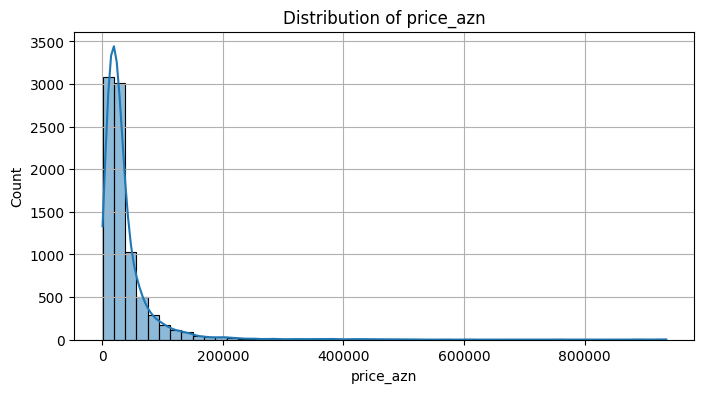

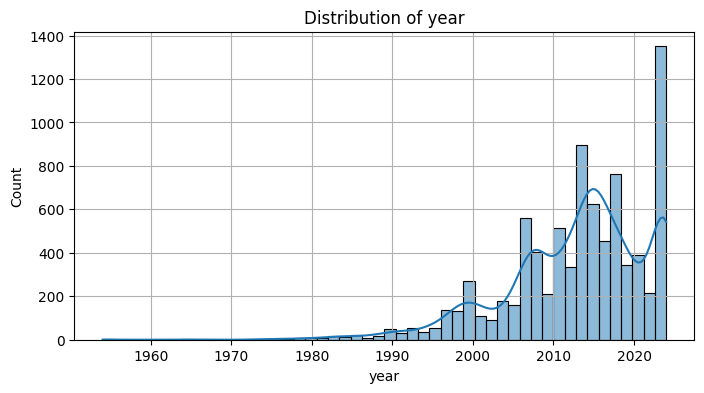

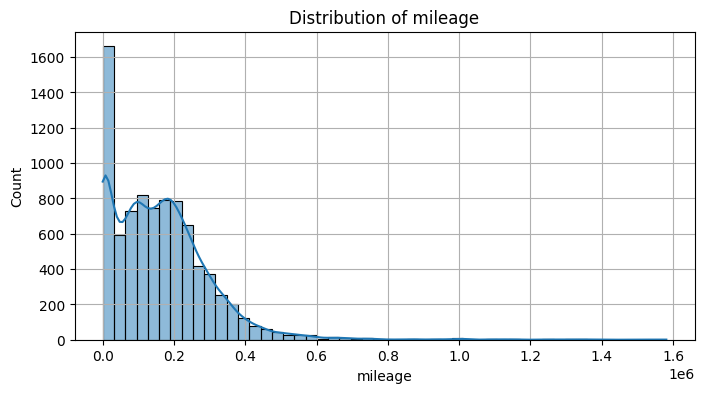

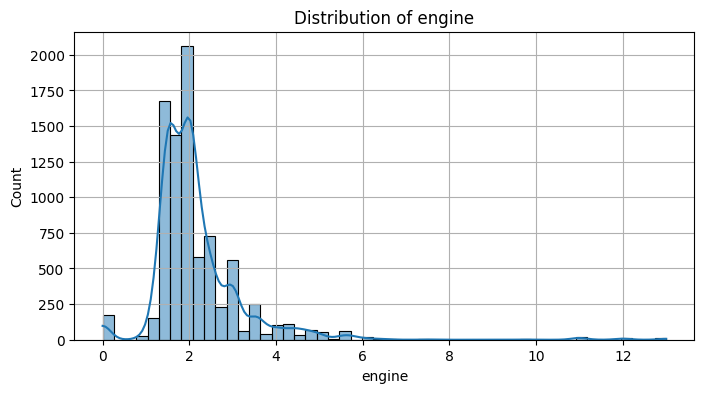

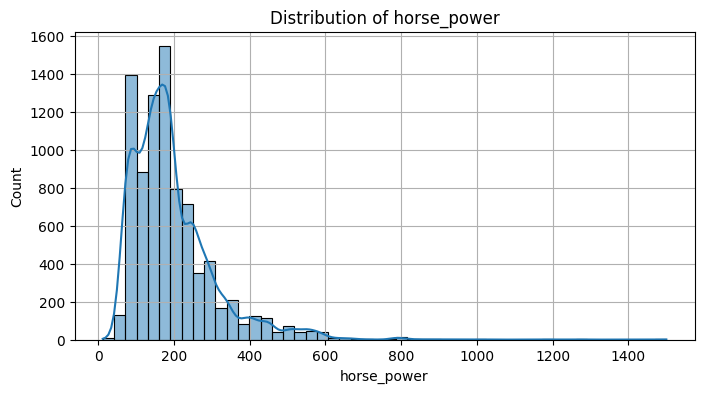

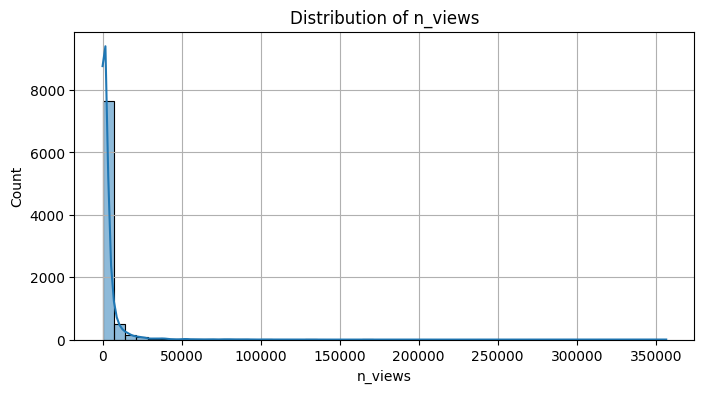

In [5]:
numeric_features = ['price_azn', 'year', 'mileage', 'engine', 'horse_power', 'n_views']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.grid()
    plt.show()

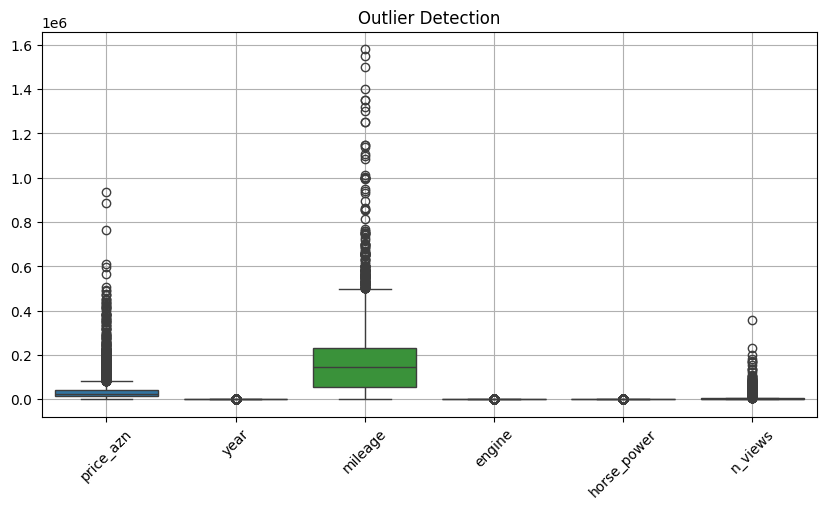

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_features])
plt.xticks(rotation=45)
plt.title("Outlier Detection")
plt.grid()
plt.show()

In [7]:
for col in ['price_azn', 'mileage']:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(lower, upper)

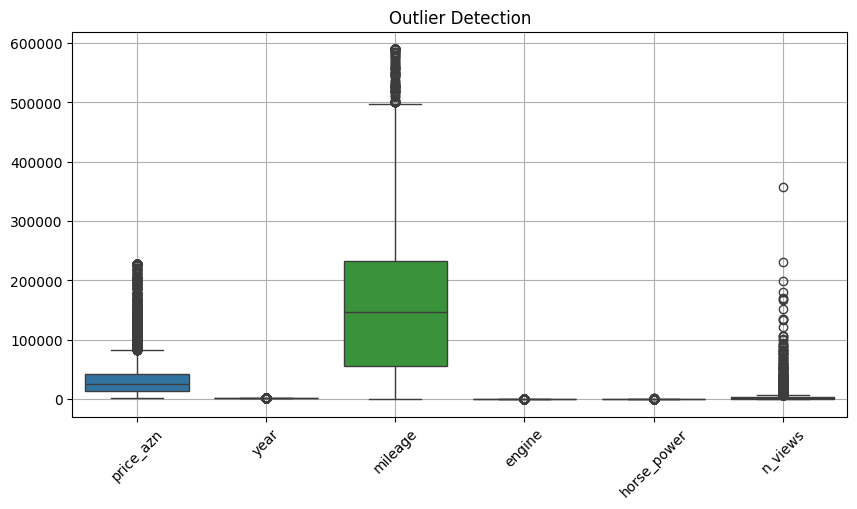

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_features])
plt.xticks(rotation=45)
plt.title("Outlier Detection")
plt.grid()
plt.show()

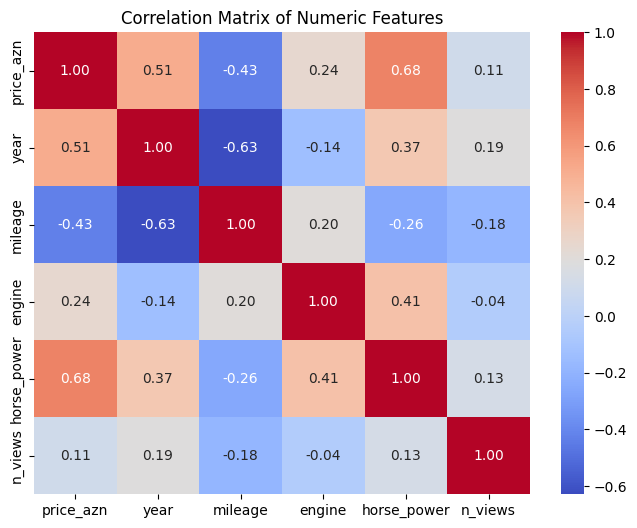

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [10]:
features = ['price_azn', 'year', 'mileage', 'engine', 'horse_power', 'n_views']
X = df[features]

# Scale features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

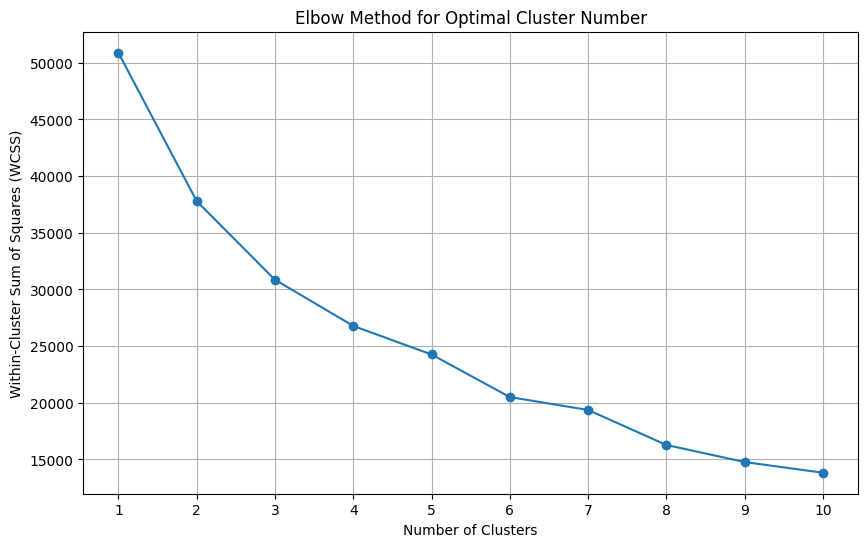

In [11]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [12]:
# Apply K-Means with selected clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Cluster statistics using original feature values
cluster_stats = df.groupby('cluster')[features].mean()

**1. Car Market Segments by Price and Year**


Detailed Market Segment Analysis:
                        persona  count  percentage      price_azn  \
cluster                                                             
0           Affordable Classics    785         9.3   43080.397452   
1          Mainstream Moderates   4051        47.8   33368.148605   
2        Premium Luxury Segment    800         9.4  123948.390625   
3              Value Performers   2846        33.6   13080.043921   

                year        mileage    engine  horse_power       n_views  
cluster                                                                   
0        2010.222930  204916.991962  4.534395   332.160510   3184.256051  
1        2017.804246   97500.862750  1.847914   177.607998   3297.954332  
2        2021.955000   26587.270000  2.297750   386.937500  11998.341250  
3        2003.888616  268957.252094  1.970134   128.251581   1653.235770  


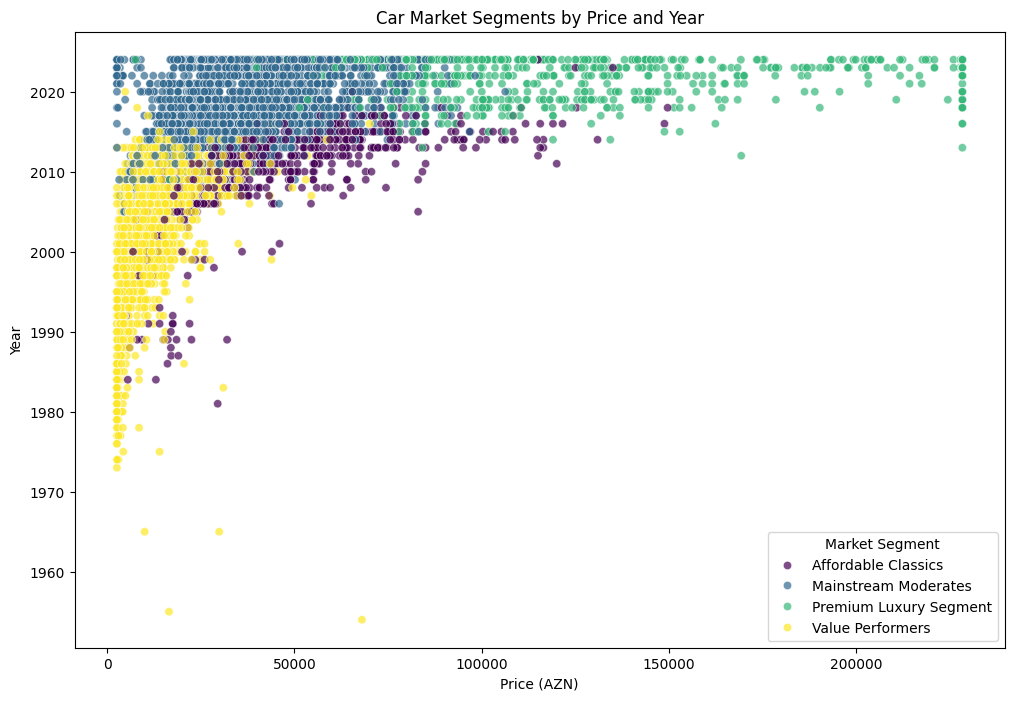

In [13]:
# Define cluster personas based on characteristics
cluster_personas = {
    0: "Affordable Classics",
    1: "Mainstream Moderates",
    2: "Premium Luxury Segment",
    3: "Value Performers"
}

# Map cluster numbers to persona names
df['persona'] = df['cluster'].map(cluster_personas)

# Visualize clusters with persona labels using ORIGINAL (non-standardized) values
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='price_azn',  # Using original price
    y='year',       # Using original year
    hue='cluster', 
    palette='viridis',
    data=df, 
    alpha=0.7
)

# Create legend with persona names instead of cluster numbers
handles, labels = scatter.get_legend_handles_labels()
new_labels = [f"{cluster_personas[int(label)]}" for label in labels]
plt.legend(handles=handles, labels=new_labels, title="Market Segment", loc='lower right')

plt.title('Car Market Segments by Price and Year')
plt.xlabel('Price (AZN)')
plt.ylabel('Year')

# Create a more detailed summary table with personas
summary = pd.DataFrame(cluster_stats)
summary['count'] = df['cluster'].value_counts().sort_index()
summary['percentage'] = (summary['count'] / len(df) * 100).round(1)
summary['persona'] = [cluster_personas[i] for i in summary.index]

# Reorder columns to put persona first
cols = ['persona', 'count', 'percentage'] + features
summary = summary[cols]

print("\nDetailed Market Segment Analysis:")
print(summary)

In [14]:
# Calculate mean values for each cluster
cluster_profiles = df.groupby('cluster')[features].mean()

# Calculate size of each cluster
cluster_profiles['count'] = df['cluster'].value_counts().sort_index()

# Calculate z-scores to show how clusters differ from overall mean
for feature in features:
    overall_mean = df[feature].mean()
    overall_std = df[feature].std()
    cluster_profiles[f'{feature}_zscore'] = (
        (cluster_profiles[feature] - overall_mean) / overall_std
    )

print("Detailed Cluster Profiles:")
print(cluster_profiles)

Detailed Cluster Profiles:
             price_azn         year        mileage    engine  horse_power  \
cluster                                                                     
0         43080.397452  2010.222930  204916.991962  4.534395   332.160510   
1         33368.148605  2017.804246   97500.862750  1.847914   177.607998   
2        123948.390625  2021.955000   26587.270000  2.297750   386.937500   
3         13080.043921  2003.888616  268957.252094  1.970134   128.251581   

              n_views  count  price_azn_zscore  year_zscore  mileage_zscore  \
cluster                                                                       
0         3184.256051    785          0.189486    -0.296838        0.366618   
1         3297.954332   4051         -0.070542     0.568045       -0.477848   
2        11998.341250    800          2.354583     1.041567       -1.035344   
3         1653.235770   2846         -0.613720    -1.019461        0.870078   

         engine_zscore  horse_power

**2. Brand Clusters: Identification of brands that dominate specific market segments.**

In [15]:
brand_persona_counts = df.groupby(['make', 'persona']).size().unstack(fill_value=0)

top_brands = brand_persona_counts.sum(axis=1).sort_values(ascending=False).head(15)
brand_persona_top = brand_persona_counts.loc[top_brands.index]

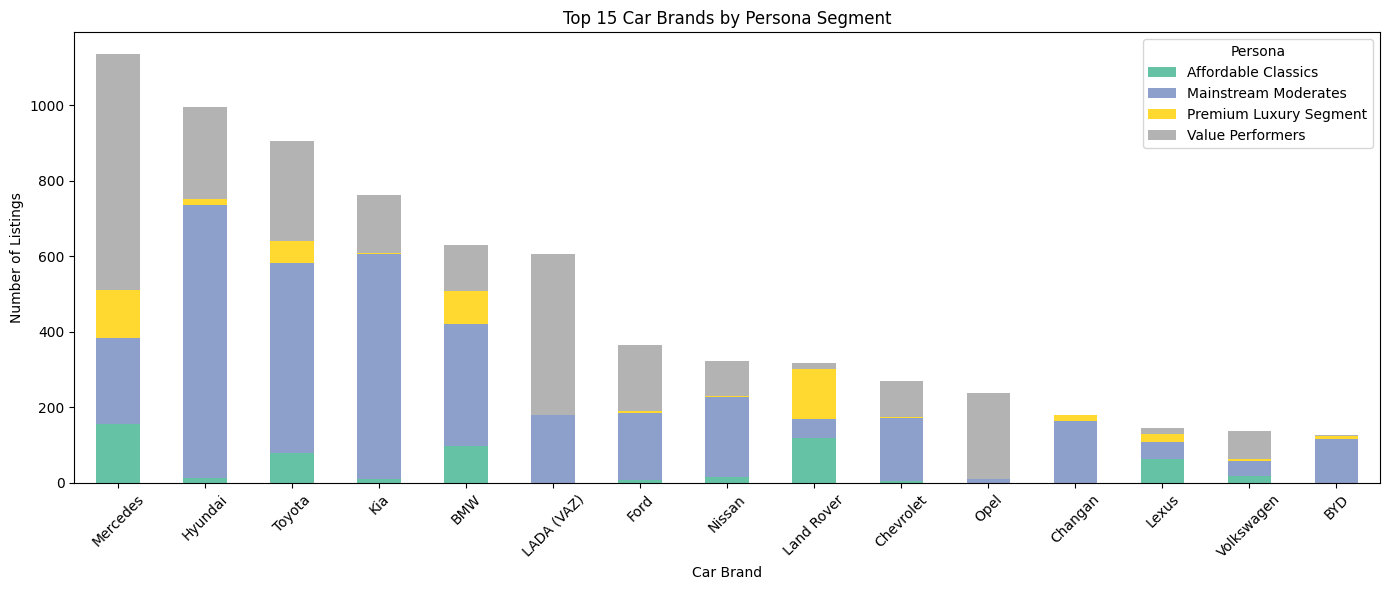

In [16]:
import matplotlib.pyplot as plt

brand_persona_top.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')

plt.title('Top 15 Car Brands by Persona Segment')
plt.xlabel('Car Brand')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Persona')
plt.tight_layout()
plt.show()

**3. Fuel Type Trends: Clusters showing preferences for diesel, petrol, hybrid, plug-in hybrid or fully electric vehicles.**

In [17]:
fuel_persona_counts = df.groupby(['fuel_type', 'persona']).size().unstack(fill_value=0)

fuel_order = ['Benzin', 'Dizel', 'Hibrid', 'Plug-in Hibrid', 'Elektro', 'Qaz'] 
fuel_persona_counts = fuel_persona_counts.loc[fuel_order]

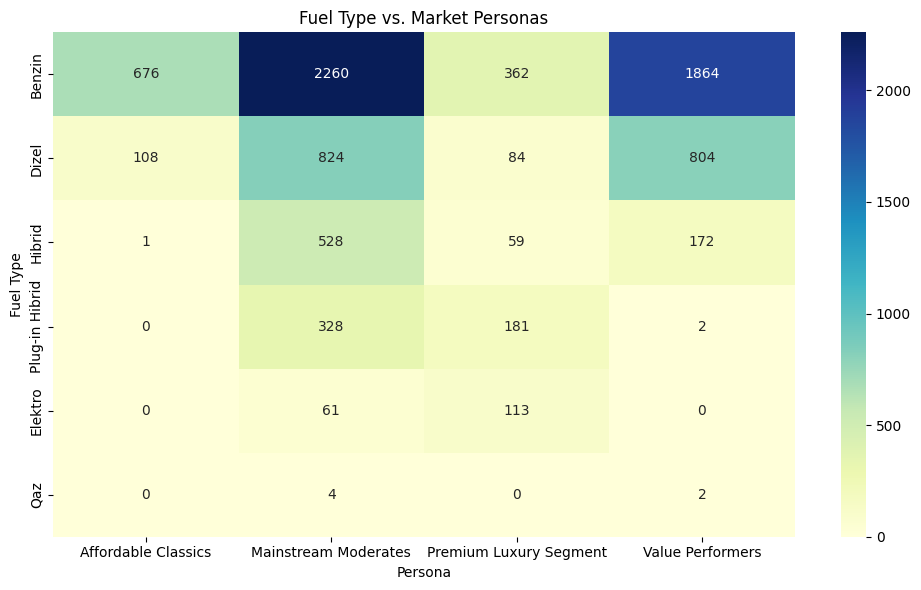

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(fuel_persona_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Fuel Type vs. Market Personas')
plt.xlabel('Persona')
plt.ylabel('Fuel Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**4. Age-Mileage Patterns with top 15 brands: Insights into how vehicle age correlates with mileage across different clusters.**

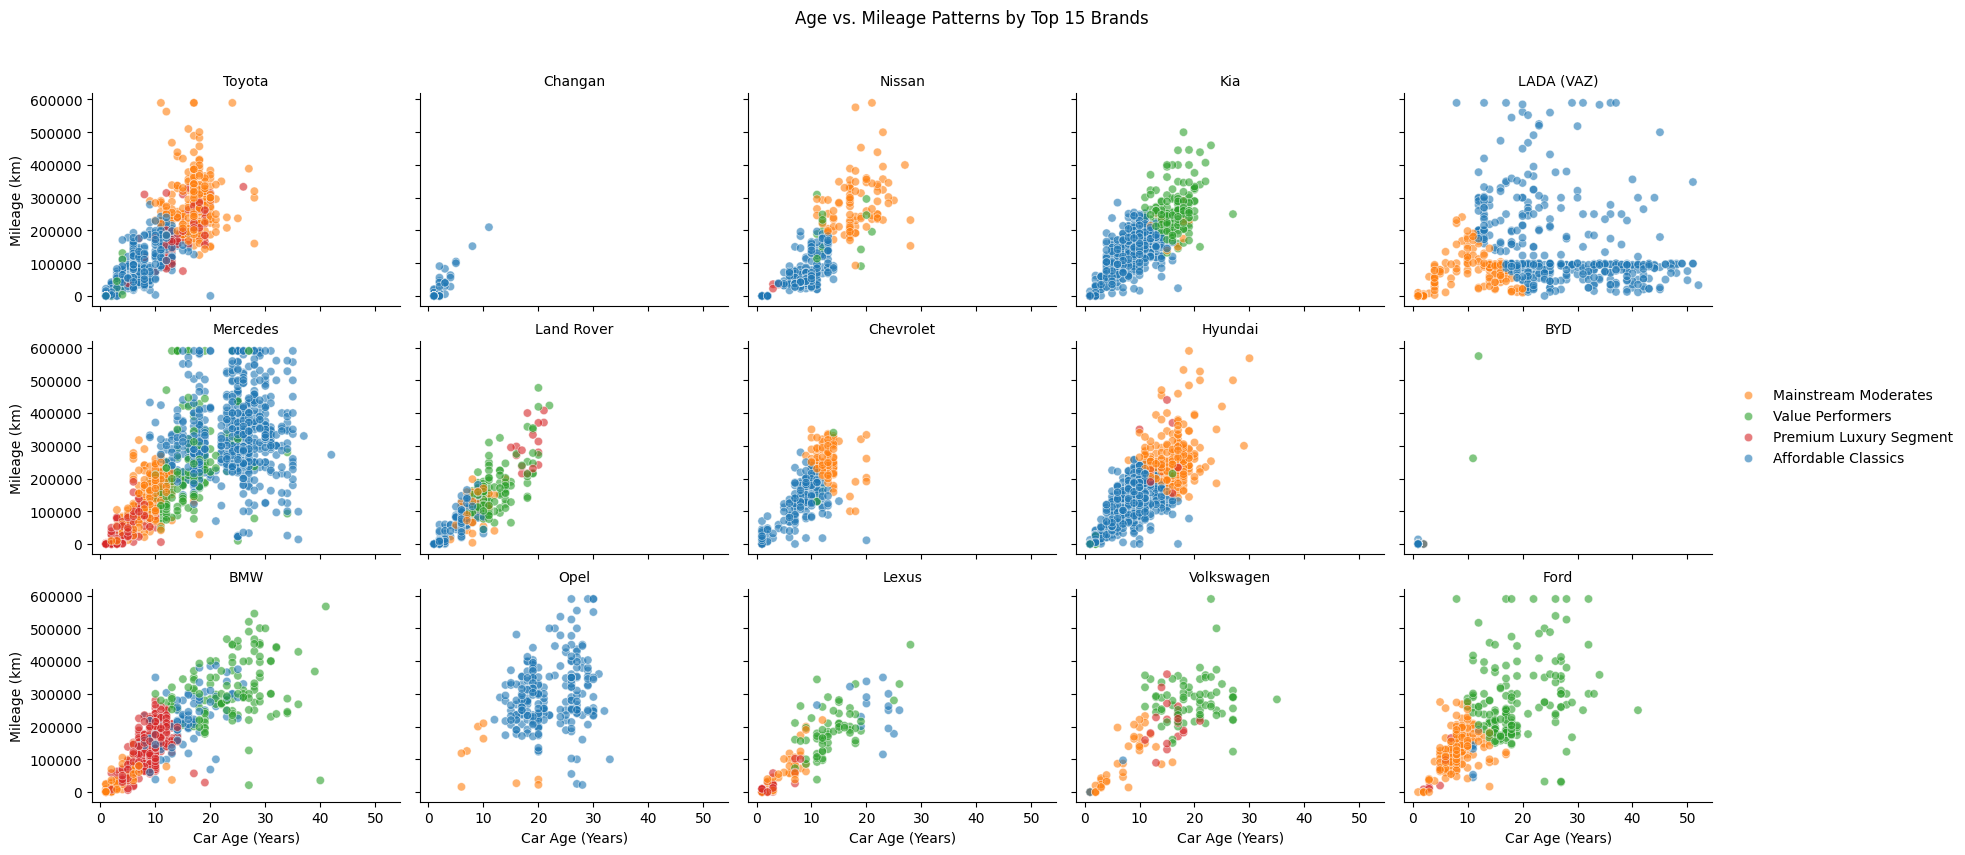

In [19]:
top_brands = df['make'].value_counts().head(15).index
df_top = df[df['make'].isin(top_brands)]

g = sns.FacetGrid(df_top, col='make', col_wrap=5, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x=2025 - df_top['year'], y='mileage', hue='persona', alpha=0.6)
g.set_axis_labels("Car Age (Years)", "Mileage (km)")
g.set_titles("{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Age vs. Mileage Patterns by Top 15 Brands")
plt.show()